In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mxbwl95a because the default path (/home/admin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv('WPP2019_PopulationByAgeSex_Medium.csv')
rus_data = data[data['Location'] == 'Russian Federation']
rus_data

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
1011549,643,Russian Federation,2,Medium,1950,1950.5,0-4,0,5,5650.418,5457.850,11108.268
1011550,643,Russian Federation,2,Medium,1950,1950.5,5-9,5,5,3481.813,3448.536,6930.349
1011551,643,Russian Federation,2,Medium,1950,1950.5,10-14,10,5,6408.176,6255.687,12663.863
1011552,643,Russian Federation,2,Medium,1950,1950.5,15-19,15,5,4987.740,5169.042,10156.782
1011553,643,Russian Federation,2,Medium,1950,1950.5,20-24,20,5,5746.885,6403.152,12150.037
...,...,...,...,...,...,...,...,...,...,...,...,...
1014715,643,Russian Federation,2,Medium,2100,2100.5,80-84,80,5,2464.971,3257.846,5722.817
1014716,643,Russian Federation,2,Medium,2100,2100.5,85-89,85,5,1708.292,2484.509,4192.801
1014717,643,Russian Federation,2,Medium,2100,2100.5,90-94,90,5,804.090,1349.404,2153.494
1014718,643,Russian Federation,2,Medium,2100,2100.5,95-99,95,5,254.132,512.567,766.699


In [3]:
# Calculate survival rates over period
def survival_rate(data, period_start = 2000, period_end = 2005):
    format_data = data[data["Time"].isin([period_start, period_end])]

    AgeGrps = format_data.AgeGrp.unique()

    surv_rate_male = []
    surv_rate_fmale = []

    for age in AgeGrps:
        
        if age != '0-4':
            surv_rate_male.append(format_data[(format_data['AgeGrp'] == age) & (format_data['Time'] == period_end)].PopMale.iloc[0] / 
                                format_data[(format_data['AgeGrp'] == prev_age) & (format_data['Time'] == period_start)].PopMale.iloc[0])

            surv_rate_fmale.append(format_data[(format_data['AgeGrp'] == age) & (format_data['Time'] == period_end)].PopFemale.iloc[0] / 
                                format_data[(format_data['AgeGrp'] == prev_age) & (format_data['Time'] == period_start)].PopFemale.iloc[0])
        prev_age = age

    return surv_rate_male, surv_rate_fmale

surv_rate_male, surv_rate_fmale = survival_rate(rus_data, 2000, 2005)
print("Male survival rates: {}".format( surv_rate_male))
print("Female survival rates: {}".format(surv_rate_fmale))


Male survival rates: [1.0142480777558232, 1.01928262190944, 1.0052312731216881, 1.0113270619683585, 0.9950467635533127, 0.9811457830354544, 0.964237698807157, 0.9562050441433044, 0.9282644158487736, 0.8955940496465928, 0.8825467080384456, 0.8132410016039625, 0.7874028510200252, 0.7143434801584925, 0.6310278362690267, 0.516789602768326, 0.38323269246612335, 0.23455803026237249, 0.13442040347026235, 0.07708628005657708]
Female survival rates: [1.0131734923668076, 1.0171888787891614, 1.0094833626181006, 1.0135037880980677, 1.0129777432909188, 1.0037368850364738, 1.0024213205444419, 0.9936141825880259, 0.9837590231972596, 0.9769839579998026, 0.96401733606714, 0.9383852374198225, 0.9234969834740889, 0.8534512745117029, 0.7708649949968792, 0.643283738060018, 0.48388898688775217, 0.3227905305773492, 0.1874511241903921, 0.10500774154784737]


In [4]:
# Calculate fertility rate
# def fertility_rate(data, year, fertilyty_ages):
#     format_data = data[(data["Time"] == year)]

#     female_pop = format_data[(format_data["Time"]==year) & (format_data["AgeGrp"].isin(fertilyty_ages))].PopFemale.sum()
#     born_pop = format_data[(format_data["Time"]==year) & (format_data["AgeGrp"] == '0-4')].PopTotal.sum()

#     fert_rate = born_pop/female_pop * 1000 * 5 / 1000

#     return fert_rate

def fertility_rate(data, year, fertilyty_ages):
    format_data = data[(data["Time"] == year)]

    female_pop = format_data[(format_data["Time"]==year) & (format_data["AgeGrp"].isin(fertilyty_ages))].PopFemale.sum()
    born_pop = format_data[(format_data["Time"]==year) & (format_data["AgeGrp"] == '0-4')].PopTotal.sum()

    fert_rate = born_pop/female_pop

    return fert_rate
    
AgeGrps = rus_data.AgeGrp.unique()
fertilyty_ages = AgeGrps[4:8]

print("Fertility rate for age group 20-39 for year 2000: {}".format(fertility_rate(rus_data, 2000, fertilyty_ages)))



Fertility rate for age group 20-39 for year 2000: 0.3026416861980896


In [5]:
# Calculate boys/girls ration
def sex_ratio(data, year):
    format_data = data[(data["Time"] == year) & (data["AgeGrp"] == '0-4')]
    sex_ratio = format_data.PopMale.iloc[0] / format_data.PopFemale.iloc[0]
    return sex_ratio

print("Sex ration for year 2000: {}".format(sex_ratio(rus_data, 2000)))


Sex ration for year 2000: 1.0511343406799192


Equation for population: Next Year population = Current Female population * Fertility rate 

For determine boys and girls number multiply by sex ratio

In [6]:
# Forecast from 2005 to 2020
period_start = 2000
period_end = 2005

sex_ratios = [sex_ratio(rus_data, year) for year in range(period_start, period_end,1)]
avg_sex_ratio = sum(sex_ratios)/len(sex_ratios)

print("Average sex ration in 2000-2005: {}".format(avg_sex_ratio))

surv_rate_male, surv_rate_fmale = survival_rate(rus_data, 2000, 2005)
print("Male survival rates: {}".format(surv_rate_male))
print("Female survival rates: {}".format(surv_rate_fmale))

AgeGrps = rus_data.AgeGrp.unique()
fertilyty_ages = AgeGrps[4:8]

fert_rates = [fertility_rate(rus_data, year, fertilyty_ages) for year in range(period_start, period_end,1)]
avg_fert_rate = sum(fert_rates)/len(fert_rates)
print("Average Fertility rate for age group 20-39 for years 2000-2005: {}".format(avg_fert_rate))


Average sex ration in 2000-2005: 1.0511002672598813
Male survival rates: [1.0142480777558232, 1.01928262190944, 1.0052312731216881, 1.0113270619683585, 0.9950467635533127, 0.9811457830354544, 0.964237698807157, 0.9562050441433044, 0.9282644158487736, 0.8955940496465928, 0.8825467080384456, 0.8132410016039625, 0.7874028510200252, 0.7143434801584925, 0.6310278362690267, 0.516789602768326, 0.38323269246612335, 0.23455803026237249, 0.13442040347026235, 0.07708628005657708]
Female survival rates: [1.0131734923668076, 1.0171888787891614, 1.0094833626181006, 1.0135037880980677, 1.0129777432909188, 1.0037368850364738, 1.0024213205444419, 0.9936141825880259, 0.9837590231972596, 0.9769839579998026, 0.96401733606714, 0.9383852374198225, 0.9234969834740889, 0.8534512745117029, 0.7708649949968792, 0.643283738060018, 0.48388898688775217, 0.3227905305773492, 0.1874511241903921, 0.10500774154784737]
Average Fertility rate for age group 20-39 for years 2000-2005: 0.31620860726770117


In [7]:
# Population forecast
class Population:
    def __init__(self, pop_data, year, fert_rate, surv_rate_male, surv_rate_fmale, sex_ratio):
        self.pop_data = pop_data
        self.fert_rate = fert_rate
        self.year = year
        self.surv_rate_male = surv_rate_male
        self.surv_rate_fmale = surv_rate_fmale
        self.sex_ratio = sex_ratio

        AgeGrps = rus_data.AgeGrp.unique()
        self.fertilyty_ages = AgeGrps[4:10]

    def simulate_period_constant(self):
        # Calculate population movement
        #fertility_range = 3
        #new_pops = self.pop_data[(self.pop_data["Time"] == self.year) & (self.pop_data["AgeGrp"].isin(self.fertilyty_ages))].PopFemale.sum() * self.fert_rate / fertility_range

        new_pops = self.pop_data[(self.pop_data["Time"] == self.year) & (self.pop_data["AgeGrp"].isin(self.fertilyty_ages))].PopFemale.sum() * self.fert_rate 

        current_pop = self.pop_data[(self.pop_data["Time"] == self.year)].copy()
        current_pop['surv_rate_m'] = [*self.surv_rate_male, 0]
        current_pop['surv_rate_f'] = [*self.surv_rate_fmale, 0]

        for index, row in current_pop.iterrows():
            if row['AgeGrp'] == '0-4':
                current_pop.loc[index, 'PopMale'] = new_pops * (0.5 - (1 - self.sex_ratio))
                current_pop.loc[index, 'PopFemale'] = new_pops * (0.5 + (1 - self.sex_ratio))
            else:
                current_pop.loc[index, 'PopMale'] = prev_row['PopMale'] * prev_row['surv_rate_m']
                current_pop.loc[index, 'PopFemale'] = prev_row['PopFemale'] * prev_row['surv_rate_f']

            current_pop.loc[index, 'PopTotal'] = current_pop.loc[index, 'PopMale'] + current_pop.loc[index, 'PopFemale']

            current_pop.loc[index, 'Time'] += 5
            prev_row = row

        self.pop_data = pd.concat([self.pop_data, current_pop], ignore_index=True) 
        self.year += 5

    def simulate_period_dynamic(self):
        # Culculate population movement
        fertility_range = 4.5

        new_pops = self.pop_data[(self.pop_data["Time"] == self.year) & (self.pop_data["AgeGrp"].isin(self.fertilyty_ages))].PopFemale.sum() * self.fert_rate / fertility_range

        current_pop = self.pop_data[(self.pop_data["Time"] == self.year)].copy()
        current_pop['surv_rate_m'] = [*self.surv_rate_male, 0]
        current_pop['surv_rate_f'] = [*self.surv_rate_fmale, 0]

        for index, row in current_pop.iterrows():
            if row['AgeGrp'] == '0-4':
                current_pop.loc[index, 'PopMale'] = new_pops * (0.5 - (1 - self.sex_ratio))
                current_pop.loc[index, 'PopFemale'] = new_pops * (0.5 + (1 - self.sex_ratio))
            else:
                current_pop.loc[index, 'PopMale'] = prev_row['PopMale'] * prev_row['surv_rate_m']
                current_pop.loc[index, 'PopFemale'] = prev_row['PopFemale'] * prev_row['surv_rate_f']

            current_pop.loc[index, 'PopTotal'] = current_pop.loc[index, 'PopMale'] + current_pop.loc[index, 'PopFemale']

            current_pop.loc[index, 'Time'] += 5
            prev_row = row

        self.pop_data = pd.concat([self.pop_data, current_pop], ignore_index=True)

        # Recalculate coeficients 
        fert_rates = [fertility_rate(self.pop_data, year, self.fertilyty_ages) for year in range(self.year-5, self.year+5, 5)]
        self.fert_rate = sum(fert_rates)/len(fert_rates)

        self.surv_rate_male, self.surv_rate_fmale = survival_rate(self.pop_data, self.year, self.year+5)

        sex_ratios = [sex_ratio(self.pop_data, year) for year in range(self.year-5, self.year+5, 5)]
        self.sex_ratio = sum(sex_ratios)/len(sex_ratios)

        self.year += 5




In [8]:
period_start = 2015

# Simulate population
pop_data = rus_data[rus_data["Time"].isin(list(range(period_start-5, period_start+1, 1)))]
rus_pop = Population(pop_data, period_start, avg_fert_rate, surv_rate_male, surv_rate_fmale, avg_sex_ratio)

for i in range(100):
    rus_pop.simulate_period_constant()

# Results comparsion
new_data_static = rus_pop.pop_data[rus_pop.pop_data["Time"].isin(list(range(period_start-5,period_start+80,5)))]
base_data = rus_data[rus_data["Time"].isin(list(range(period_start-5,period_start+80,5)))]

new_data_static["PopMale_base"] = base_data["PopMale"].to_list()
new_data_static["PopFemale_base"] = base_data["PopFemale"].to_list()
new_data_static["PopTotal_base"] = base_data["PopTotal"].to_list()

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(new_data_static[["Time", "AgeGrp", "PopMale", "PopFemale", "PopTotal", "PopMale_base", "PopFemale_base", "PopTotal_base"]])





     Time AgeGrp      PopMale    PopFemale      PopTotal  PopMale_base  \
0    2010    0-4  4129.339000  3930.934000   8060.273000      4129.339   
1    2010    5-9  3544.759000  3376.615000   6921.374000      3544.759   
2    2010  10-14  3297.642000  3138.264000   6435.906000      3297.642   
3    2010  15-19  4538.894000  4313.784000   8852.678000      4538.894   
4    2010  20-24  6370.277000  6168.879000  12539.156000      6370.277   
5    2010  25-29  6082.538000  5975.479000  12058.017000      6082.538   
6    2010  30-34  5363.187000  5471.805000  10834.992000      5363.187   
7    2010  35-39  4963.535000  5130.588000  10094.123000      4963.535   
8    2010  40-44  4289.657000  4634.994000   8924.651000      4289.657   
9    2010  45-49  5372.922000  5988.531000  11361.453000      5372.922   
10   2010  50-54  5239.015000  6228.989000  11468.004000      5239.015   
11   2010  55-59  4448.405000  5704.630000  10153.035000      4448.405   
12   2010  60-64  2928.172000  4042.51

/tmp/ipykernel_504827/1659882552.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_static["PopMale_base"] = base_data["PopMale"].to_list()
/tmp/ipykernel_504827/1659882552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_static["PopFemale_base"] = base_data["PopFemale"].to_list()
/tmp/ipykernel_504827/1659882552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [9]:
period_start = 2015

# Simulate population
pop_data = rus_data[rus_data["Time"].isin(list(range(period_start-5, period_start+1, 1)))]
rus_pop = Population(pop_data, period_start, avg_fert_rate, surv_rate_male, surv_rate_fmale, avg_sex_ratio)

for i in range(100):
    rus_pop.simulate_period_dynamic()

# Results comparsion
new_data_dynamic = rus_pop.pop_data[rus_pop.pop_data["Time"].isin(list(range(period_start-5,period_start+80,5)))]
base_data = rus_data[rus_data["Time"].isin(list(range(period_start-5,period_start+80,5)))]

new_data_dynamic["PopMale_base"] = base_data["PopMale"].to_list()
new_data_dynamic["PopFemale_base"] = base_data["PopFemale"].to_list()
new_data_dynamic["PopTotal_base"] = base_data["PopTotal"].to_list()


with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(new_data_dynamic[["Time", "AgeGrp", "PopMale", "PopFemale", "PopTotal", "PopMale_base", "PopFemale_base", "PopTotal_base"]])





     Time AgeGrp      PopMale    PopFemale      PopTotal  PopMale_base  \
0    2010    0-4  4129.339000  3930.934000   8060.273000      4129.339   
1    2010    5-9  3544.759000  3376.615000   6921.374000      3544.759   
2    2010  10-14  3297.642000  3138.264000   6435.906000      3297.642   
3    2010  15-19  4538.894000  4313.784000   8852.678000      4538.894   
4    2010  20-24  6370.277000  6168.879000  12539.156000      6370.277   
5    2010  25-29  6082.538000  5975.479000  12058.017000      6082.538   
6    2010  30-34  5363.187000  5471.805000  10834.992000      5363.187   
7    2010  35-39  4963.535000  5130.588000  10094.123000      4963.535   
8    2010  40-44  4289.657000  4634.994000   8924.651000      4289.657   
9    2010  45-49  5372.922000  5988.531000  11361.453000      5372.922   
10   2010  50-54  5239.015000  6228.989000  11468.004000      5239.015   
11   2010  55-59  4448.405000  5704.630000  10153.035000      4448.405   
12   2010  60-64  2928.172000  4042.51

/tmp/ipykernel_504827/1801914467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_dynamic["PopMale_base"] = base_data["PopMale"].to_list()
/tmp/ipykernel_504827/1801914467.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_dynamic["PopFemale_base"] = base_data["PopFemale"].to_list()
/tmp/ipykernel_504827/1801914467.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

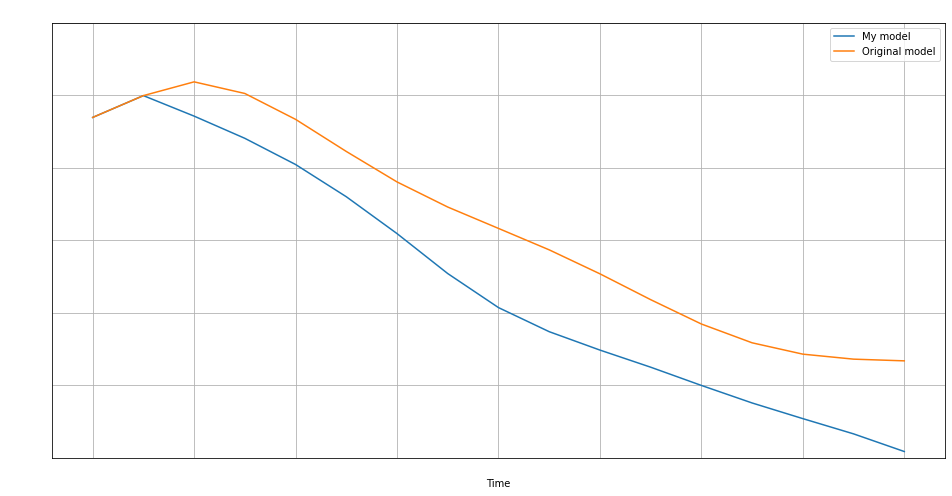

In [10]:
def plot_total_pop(data, label, years = None):
    if years is not None:
        plot_data = data[data["Time"].isin(years)]
    
    plot_data = data.groupby("Time").sum()
    plot_data.rename(columns = {'PopTotal':'My model', 'PopTotal_base':'Original model'}, inplace = True)
    plot_data.reset_index().plot(x = "Time", y = ["My model", "Original model"], figsize=(16,8), ylim=(120000,150000))

    plt.title(label, color = 'w')
    plt.legend(loc = "best")
    plt.grid()
    plt.tick_params( colors='white')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_total_pop(data = new_data_static, label = "Total pop of static model")
#plot_total_pop(data = new_data_dynamic, label = "Total pop of dynamic model")

In [14]:
def plot_age_grp(data, age_grps, years):

    fig = plt.figure(figsize=(18, 9))

    for age in age_grps:
        data_filtered = data[(data["AgeGrp"] == age) & (data["Time"].isin(years))]
        plt.plot(data_filtered.Time, data_filtered.PopMale, label = "Male {}".format(age))
        plt.plot(data_filtered.Time, data_filtered.PopFemale,  label = "Female {}".format(age))

        plt.plot(data_filtered.Time, data_filtered.PopMale_base, label = "Male base {}".format(age))
        plt.plot(data_filtered.Time, data_filtered.PopFemale_base,  label = "Female base {}".format(age))

    plt.title("Age groups by sex", color = 'w')
    plt.legend(loc = "best")
    plt.grid()
    plt.tick_params( colors='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def bar_age_grps_year(data, year):
    data_filtered = data[data["Time"]== year]

    fig = plt.figure(figsize=(18, 9))


    ab_bar_list = [plt.bar(data_filtered.AgeGrp.unique(), data_filtered.PopFemale + data_filtered.PopMale, align='edge', width= 0.3, label = "Female my model"),
               plt.bar(data_filtered.AgeGrp.unique(), data_filtered.PopMale, align='edge', width= 0.3, label = "Male my model")]

    cd_bar_list = [plt.bar(data_filtered.AgeGrp.unique(), data_filtered.PopFemale_base + data_filtered.PopMale_base, align='edge',width= -0.3, label = "Female basic model"),
               plt.bar(data_filtered.AgeGrp.unique(), data_filtered.PopMale_base, align='edge',width= -0.3, label = "Male basic model")]


    plt.title("Population by age grps year {}".format(year), color = "w")
    plt.xticks(rotation='vertical')
    plt.tick_params( colors='white')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(loc = "best")
    plt.show()

    



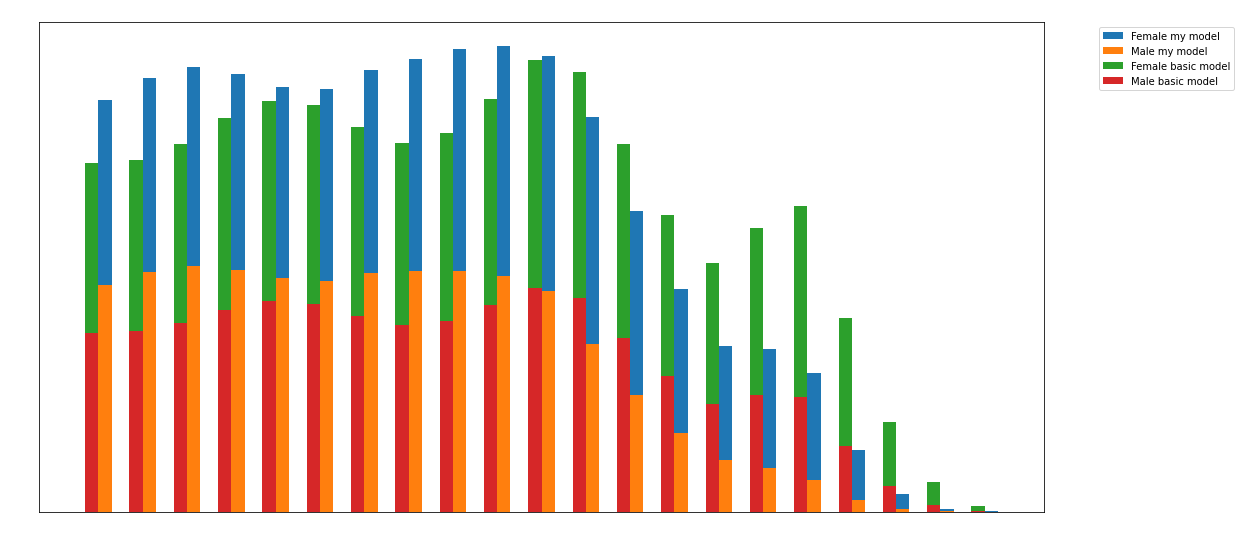

In [12]:
bar_age_grps_year(new_data_static, 2090)

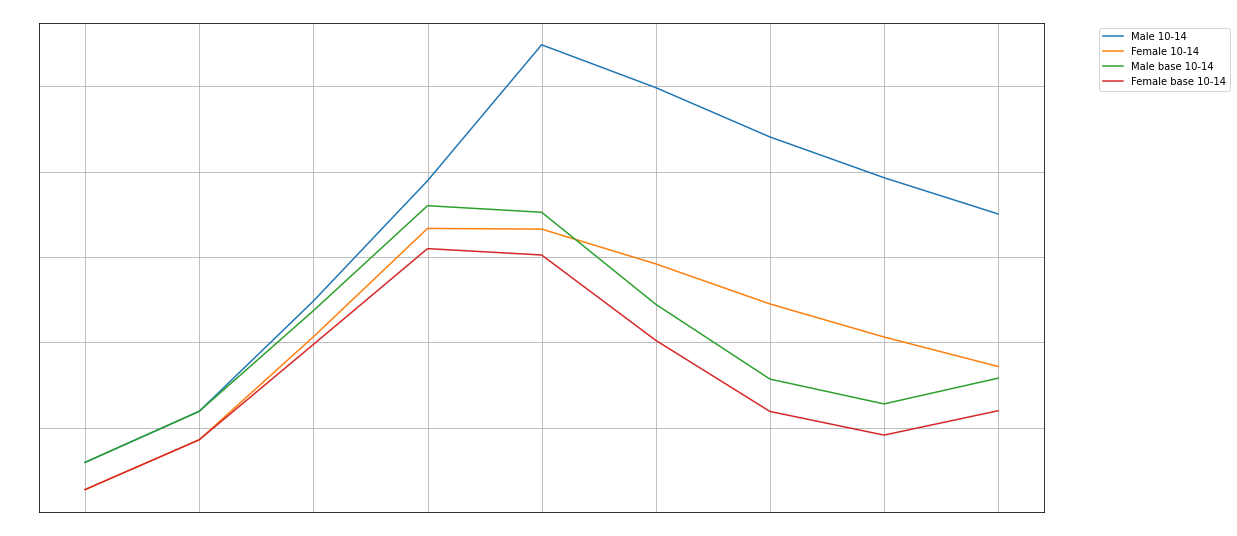

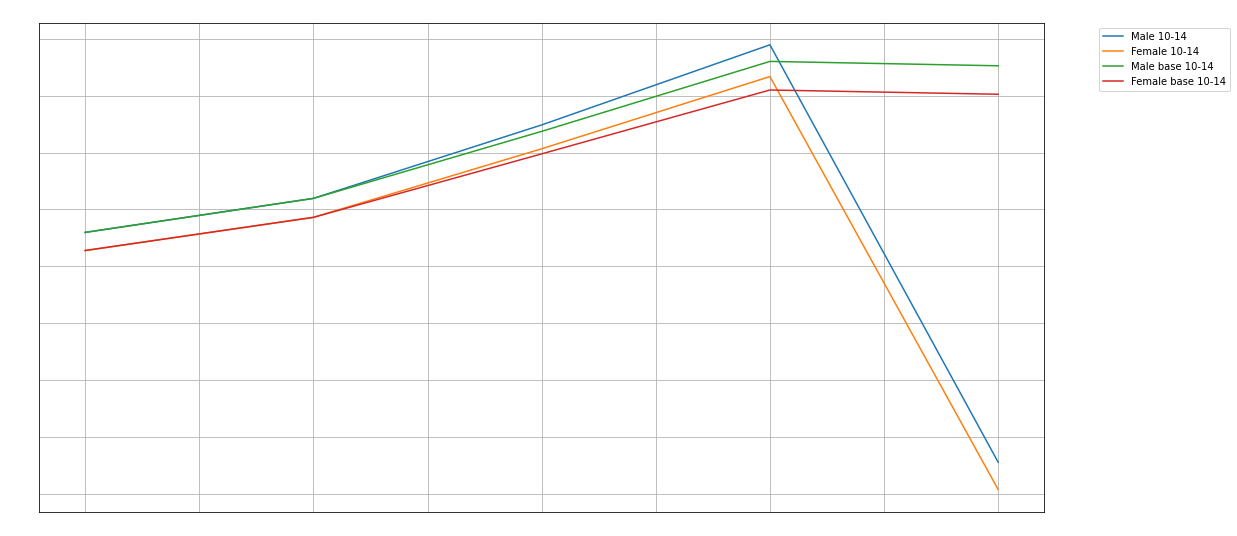

In [13]:
plot_age_grp(new_data_static, ["10-14"], list(range(2010, 2055, 5)))
plot_age_grp(new_data_dynamic, ["10-14"], list(range(2010, 2035, 5)))